In [58]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pydsm
import math

os.listdir("/media/ayush/DATA1/Hydrophone Recording/")

['.ipynb_checkpoints',
 '0 Degree Horizontal.csv',
 '0 Degree Vertical.csv',
 '11 Degree Horizontal.csv',
 '11 Degree Vertical.csv',
 '45 Degree Horizontal.csv',
 '45 Degree Vertical.csv',
 'Recording 1']

In [4]:
D0H_df = pd.read_csv("/media/ayush/DATA1/Hydrophone Recording/45 Degree Horizontal.csv")
print("Shape of the recording CSV: " + str(D0H_df.shape))
D0H_df.head()

/home/ayush/Projects/mlpython3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Shape of the recording CSV: (3000003, 6)


,Timestamp,18-05-2019 17:55:10,Timestamp.1,18-05-2019 17:55:10.1,Timestamp.2,18-05-2019 17:55:10.2
0,Interval,1E-05,Interval,1E-05,Interval,1E-05
1,Channel name,Input 0,Channel name,Input 1,Channel name,Input 2
2,Unit,V,Unit,V,Unit,V
3,0,0.014754483000000002,0,0.012032282000000002,0,0.016307755
4,1E-05,0.015078009000000003,1E-05,0.012032282000000002,1E-05,0.016307755


In [5]:
first_channel_rec = D0H_df[['Timestamp','18-05-2019 17:55:10']]
second_channel_rec = D0H_df[['Timestamp.1','18-05-2019 17:55:10.1']]
third_channel_rec = D0H_df[['Timestamp.2','18-05-2019 17:55:10.2']]
# fourth_channel_rec = D0H_df[['Timestamp.3','16-05-2019 22:22:42.3']]

time_interval = float(first_channel_rec.iloc[0,1])
sampling_rate = round(1/time_interval)
print("Time interval: " + str(time_interval))
print("Sampling Rate: " + str(sampling_rate))

#Dropping the first two rows and converting to numpy
first_channel_rec = first_channel_rec.iloc[3:].to_numpy().astype(float)
second_channel_rec = second_channel_rec.iloc[3:].to_numpy().astype(float)
third_channel_rec = third_channel_rec.iloc[3:].to_numpy().astype(float)
#fourth_channel_rec = fourth_channel_rec.iloc[3:].to_numpy().astype(float)
print("Shapes of individual recordings: " +  str(np.shape(first_channel_rec)))

first_channel_rec

Time interval: 1e-05
Sampling Rate: 100000
Shapes of individual recordings: (3000000, 2)


array([[0.0000000e+00, 1.4754483e-02],
       [1.0000000e-05, 1.5078009e-02],
       [2.0000000e-05, 1.4430957e-02],
       ...,
       [2.9999970e+01, 8.6074890e-03],
       [2.9999980e+01, 8.2839630e-03],
       [2.9999990e+01, 8.6074890e-03]])

In [29]:
def plot_graph(data):
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    plt.plot(data[87500:100000,0], data[87500:100000,1])

(12500, 2)

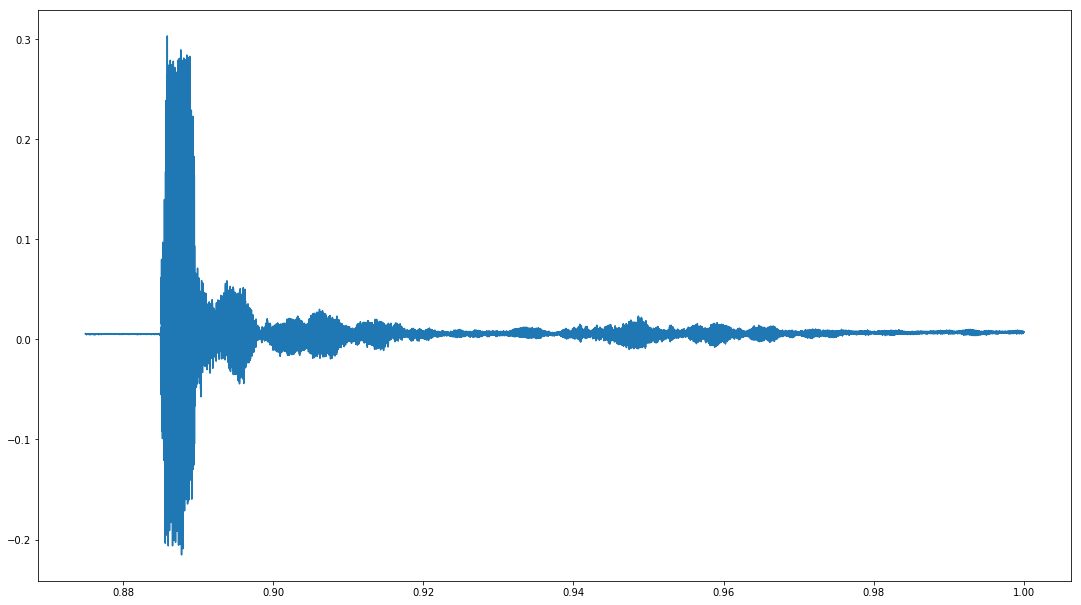

In [32]:
plot_graph(first_channel_rec)
first_channel_rec_cleaned = first_channel_rec[87500:100000,:]
np.shape(first_channel_rec_cleaned)

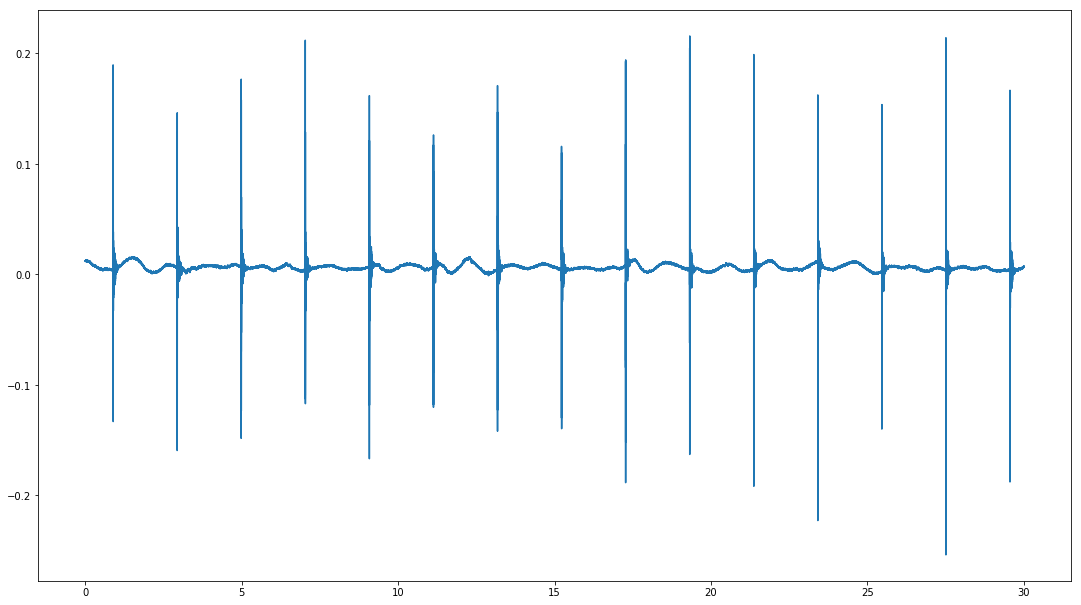

In [8]:
plot_graph(second_channel_rec)

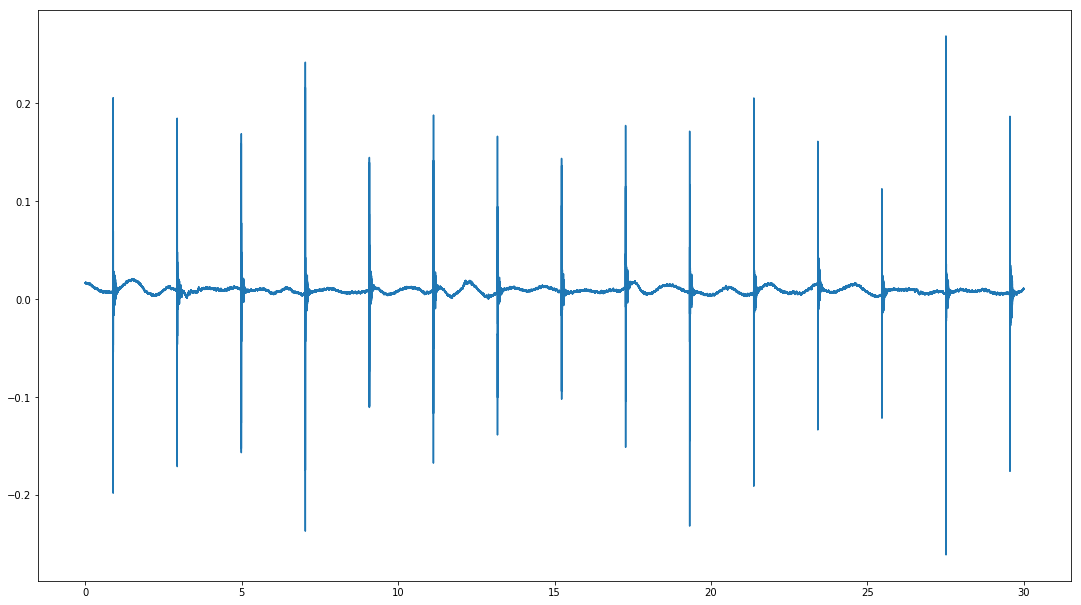

In [9]:
plot_graph(third_channel_rec)

In [ ]:
#plot_graph(fourth_channel_rec)

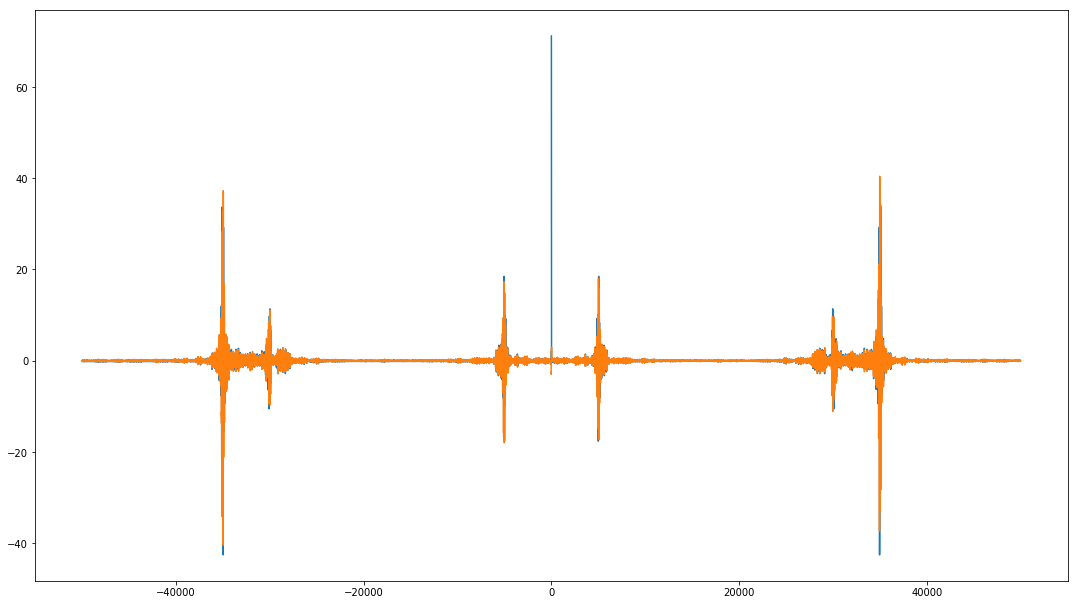

[71.19337871+0.j          1.96250525+2.55352605j  0.74655046+2.95787473j
 ...  0.23392163-1.32753406j  0.74655046-2.95787473j
  1.96250525-2.55352605j]
[  0.   8.  16. ... -24. -16.  -8.]
Shapes of sp: (12500,), freq:(12500,)


In [43]:
sp = np.fft.fft(first_channel_rec_cleaned[:,1])
freq = np.fft.fftfreq(first_channel_rec_cleaned[:,1].shape[-1], d=1e-5)
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()
print(sp)
print(freq)
print("Shapes of sp: " + str(np.shape(sp)) + ", freq:" + str(np.shape(freq)))

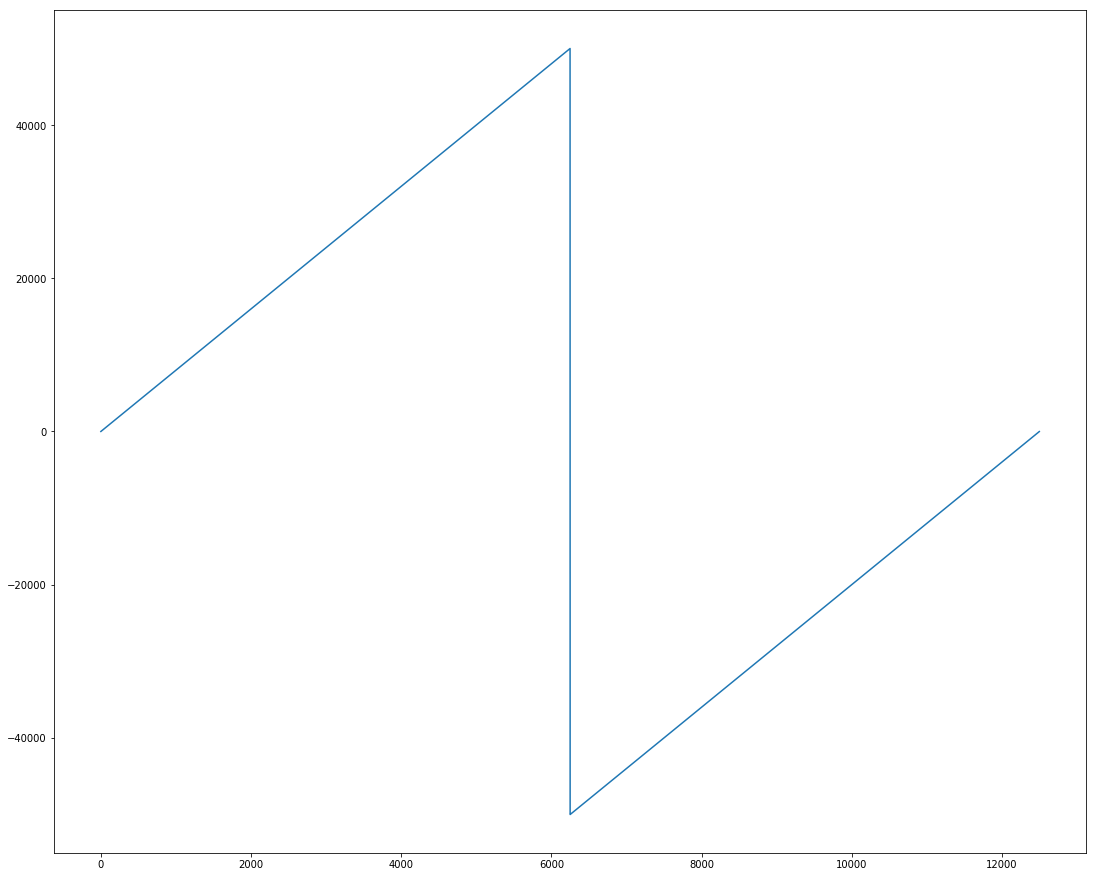

In [56]:
fig = plt.figure()
fig.set_size_inches(18.5, 15.5)
plt.plot(freq)

In [69]:
pinger_freq = 35e3
data_point = int(pinger_freq/8)
print("The information about " + str(pinger_freq) + " is the data_point: " + str(data_point))
data_pinger_freq = sp[data_point]
print("The fft data at the data_point is: " + str(data_pinger_freq))
phase_info = math.atan(sp[data_point].imag/sp[data_point].real)/math.pi*180
print("The phase at the values given is: " + str(phase_info))

The information about 35000.0 is the data_point: 4375
The fft data at the data_point is: (20.300822106837675+20.398179809199853j)
The phase at the values given is: 45.13705925319521


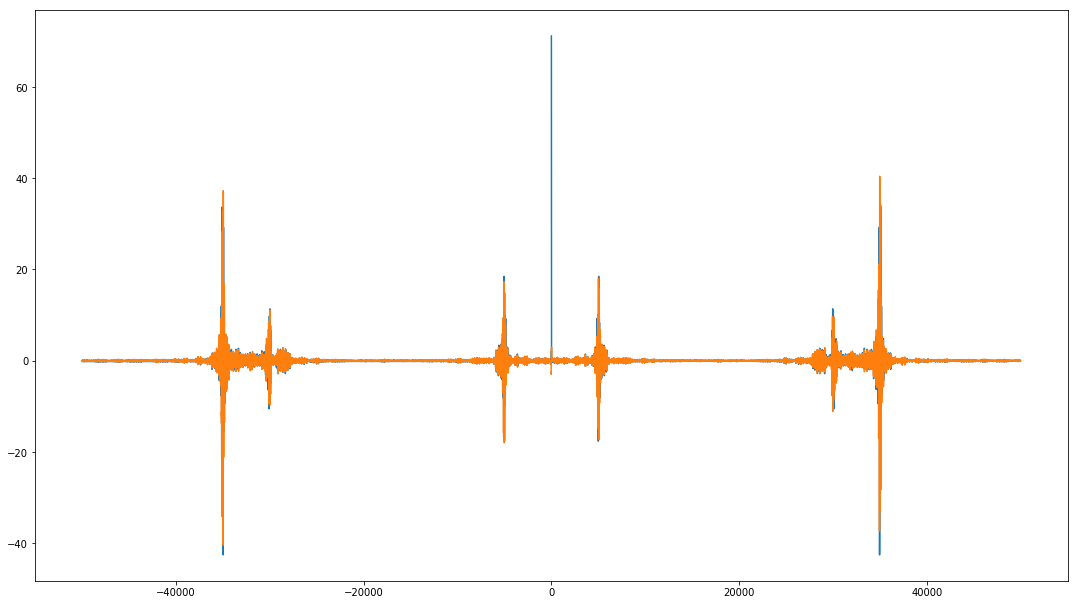

[71.19337871+0.j          1.96250525+2.55352605j  0.74655046+2.95787473j
 ...  0.23392163-1.32753406j  0.74655046-2.95787473j
  1.96250525-2.55352605j]
[  0.   8.  16. ... -24. -16.  -8.]
Shapes of sp: (12500,), freq:(12500,)
The information about 35000.0 is the data_point: 4375
The fft data at the data_point is: (20.300822106837675+20.398179809199853j)
The phase at the values given is: 45.13705925319521


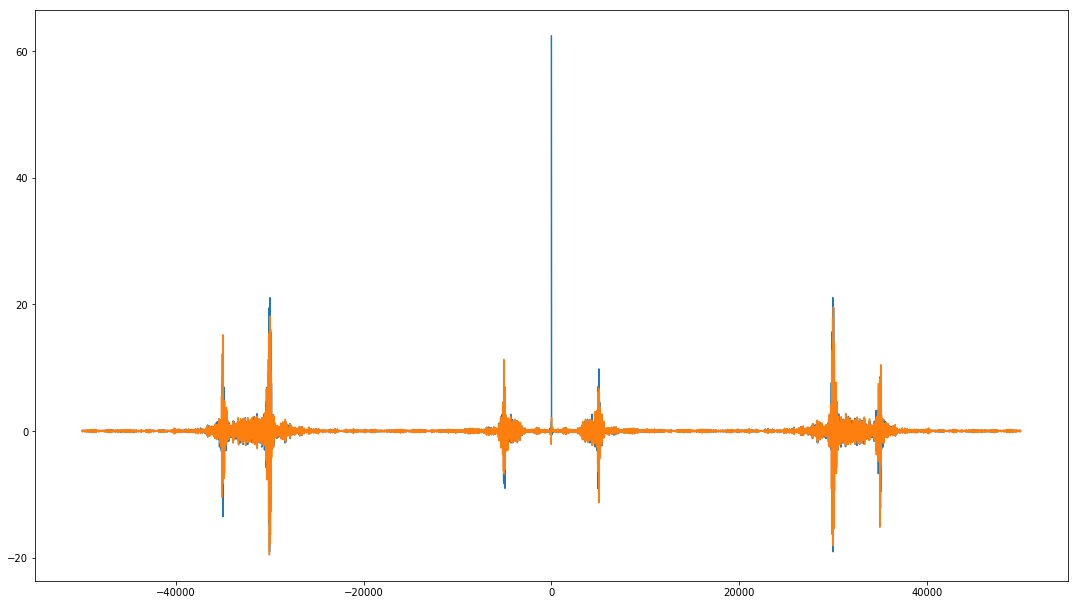

[62.37140867+0.j          1.34721386+1.0850559j  -0.22381701+2.11542252j
 ...  0.53545189-0.22824799j -0.22381701-2.11542252j
  1.34721386-1.0850559j ]
[  0.   8.  16. ... -24. -16.  -8.]
Shapes of sp: (12500,), freq:(12500,)
The information about 35000.0 is the data_point: 4375
The fft data at the data_point is: (-13.517185245981127-5.295987468540831j)
The phase at the values given is: 21.39507794711458


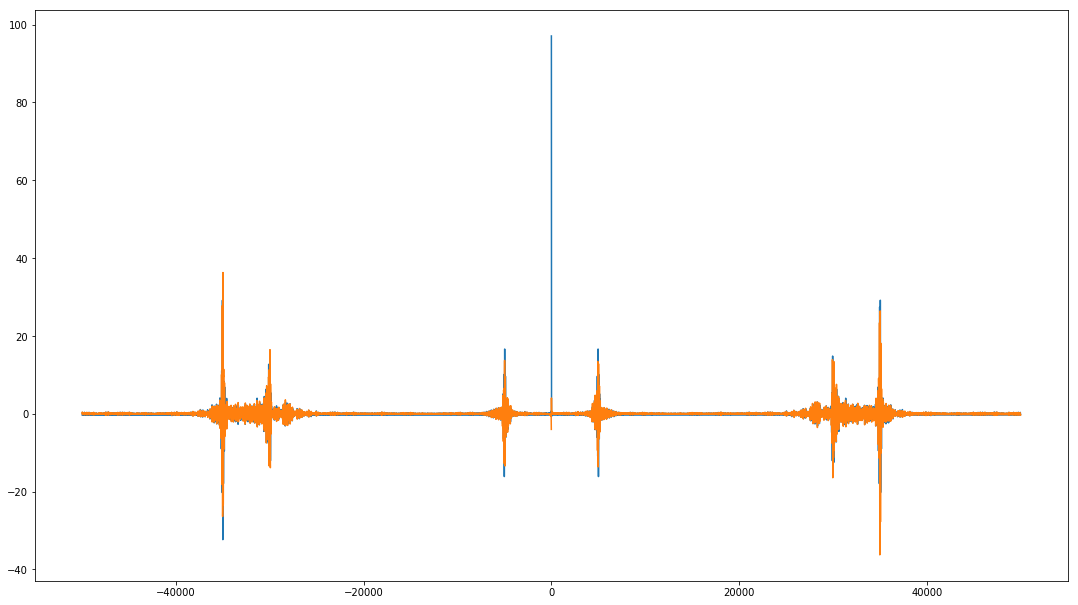

[97.06381277+0.j          0.62299469+4.03052417j -0.66123445+1.71823164j
 ...  0.47859925-0.37802594j -0.66123445-1.71823164j
  0.62299469-4.03052417j]
[  0.   8.  16. ... -24. -16.  -8.]
Shapes of sp: (12500,), freq:(12500,)
The information about 35000.0 is the data_point: 4375
The fft data at the data_point is: (-19.601449386608312-23.74553288494701j)
The phase at the values given is: 50.46102724733726
The three phases are: 45.13705925319521, 21.39507794711458, 50.46102724733726


In [74]:
pinger_freq = 35e3

def give_phase_in_degrees(data):
    data_cleaned = data[87500:100000,:]
    np.shape(data_cleaned)
    sp = np.fft.fft(data_cleaned[:,1])
    freq = np.fft.fftfreq(data_cleaned[:,1].shape[-1], d=1e-5)
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    plt.plot(freq, sp.real, freq, sp.imag)
    plt.show()
    print(sp)
    print(freq)
    print("Shapes of sp: " + str(np.shape(sp)) + ", freq:" + str(np.shape(freq)))
    data_point = int(pinger_freq/8)
    print("The information about " + str(pinger_freq) + " is the data_point: " + str(data_point))
    data_pinger_freq = sp[data_point]
    print("The fft data at the data_point is: " + str(data_pinger_freq))
    phase_info = math.atan(sp[data_point].imag/sp[data_point].real)/math.pi*180
    print("The phase at the values given is: " + str(phase_info))
    return phase_info


first_phase = give_phase_in_degrees(first_channel_rec)
second_phase = give_phase_in_degrees(second_channel_rec)
third_phase = give_phase_in_degrees(third_channel_rec)

print("The three phases are: {}, {}, {}".format(first_phase, second_phase, third_phase))

In [78]:
heading = math.atan((third_phase - second_phase)/(first_phase - second_phase))*180/math.pi
print("The heading calculated is: " + str(heading))

The heading calculated is: 50.75696969818189
